In [156]:
#import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the dataset
df=pd.read_csv('house_data_fs.csv', index_col = 0)
df = df.dropna()
print(df.shape)
print(df.head())

(21600, 3)
    price  bedrooms  sqft_living
0  221900       3.0         1180
1  538000       3.0         2570
2  180000       2.0          770
3  604000       4.0         1960
4  510000       3.0         1680


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21600 entries, 0 to 21612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21600 non-null  int64  
 1   bedrooms     21600 non-null  float64
 2   sqft_living  21600 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 675.0 KB


In [158]:
print(df["bedrooms"].corr(df["price"]))
print(df["sqft_living"].corr(df["price"]))

0.3088904326896186
0.7019105610375241


In [159]:
# define the features and target variable
X = df[['bedrooms', 'sqft_living']].values
Y = df['price'].values

print("X shape:", X.shape)

X shape: (21600, 2)


In [160]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [161]:
# train a linear regression model on the scaled data
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_scaled, Y)
print(lr.coef_, lr.intercept_)

# make predictions on a new data point 
X_test = [[2, 860]]
X_test_scaled = scaler.transform(X_test)
yp=lr.predict(X_test_scaled)
print(yp)

[-53567.44561984 288667.55112691] 540166.7341666666
[235932.46722026]


In [162]:
# create a new dataframe df1 where bedrooms equal to 2 and sqft_living equal to 860
df1=df[(df['bedrooms'] == 2) & (df['sqft_living'] == 860)]
print(df1.shape)

# calculate the average price of houses in df1
df1_avg = df1['price'].mean()
print("Average price:", df1_avg)  

(38, 3)
Average price: 303760.2105263158


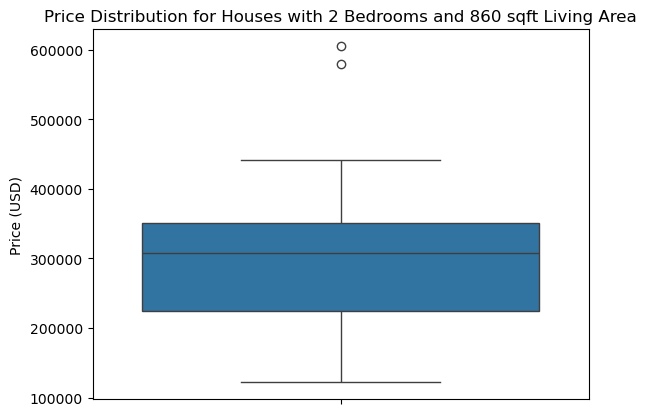

In [163]:
#visulize the price distribution for houses with 2 bedrooms and 860 sqft living area
sns.boxplot(y=df1['price'])
plt.title('Price Distribution for Houses with 2 Bedrooms and 860 sqft Living Area')
plt.ylabel('Price (USD)')
plt.show()

In [164]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Y_pred = lr.predict(X_scaled)
rscore = r2_score(Y, Y_pred)
mse = mean_squared_error(Y, Y_pred)
mae = mean_absolute_error(Y, Y_pred)

print('r2-score:', rscore, '\nmean squared error:', mse, '\nmean absolute error:', mae)

r2-score: 0.5068463227480232 
mean squared error: 66465040515.6965 
mean absolute error: 170271.09681228665
